In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from descriptors import spectra_descriptor, wave_param_descriptor, calculate_wave_params

In [2]:
data = xr.open_dataset(r'data/combined_dataset.nc')
data = data.fillna(0)
data.variables

Frozen({'nora_mdir': <xarray.Variable (station: 3, time: 61255, frequency: 80)> Size: 118MB
array([[[  0.        ,   0.        , 153.34021365, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        , 155.56773402, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        , 158.9926005 , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        , 275.31265306, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        , 277.80386286, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        , 285.79667844, ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        , 147.34397303, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        , 146.94754089, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.  

In [4]:
freq = data['frequency'].data
fmi_nbp_spec = data['insitu_spec'].sel(station='nbp').data
nora_nbp_spec = data['nora_spec'].sel(station='nbp').data

fmi_gof_spec = data['insitu_spec'].sel(station='gof').data
nora_gof_spec = data['nora_spec'].sel(station='gof').data

fmi_bot_spec = data['insitu_spec'].sel(station='bot').data
nora_bot_spec = data['nora_spec'].sel(station='bot').data
nora_nbp_spec

array([[0.00000000e+00, 0.00000000e+00, 2.04028145e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.98425461e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.99151726e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.92549991e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.86379353e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [4]:
fmi_nbp_spec

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.06994359e-04, 4.42618165e-04, 4.75852850e-03, ...,
        2.22044605e-16, 2.22044605e-16, 2.22044605e-16],
       [3.82875227e-04, 2.33954371e-03, 2.33352142e-02, ...,
        2.22044605e-16, 2.22044605e-16, 2.22044605e-16],
       ...,
       [1.01252100e-04, 1.27754500e-03, 4.59489400e-03, ...,
        2.38062300e-02, 1.13016300e-02, 1.00236400e-02],
       [1.38054000e-04, 2.42284900e-03, 8.84583300e-03, ...,
        1.80825400e-02, 1.56418000e-02, 1.40827000e-02],
       [3.25405700e-05, 7.48217100e-04, 3.23796500e-03, ...,
        1.10778400e-02, 1.27425500e-02, 1.34630200e-02]])

In [5]:
df_specstat, df_freqstat = spectra_descriptor(fmi_nbp_spec, nora_nbp_spec, freq)
df_specstat

C:\Users\sander.rikka\gitrepo\eagData\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\sander.rikka\gitrepo\eagData\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\sander.rikka\gitrepo\eagData\util\error_measures.py:132: RuntimeWarning: divide by zero encountered in divide
  self.p_t = np.abs(y_true - y_pred) / y_true
C:\Users\sander.rikka\gitrepo\eagData\util\error_measures.py:132: RuntimeWarning: invalid value encountered in divide
  self.p_t = np.abs(y_true - y_pred) / y_true
C:\Users\sander.rikka\gitrepo\eagData\util\error_measures.py:152: RuntimeWarning: invalid value encountered in divide
  self.s_t = np.abs(y_true - y_pred) / (y_true + y_pred)


,rho,me,mae,mse,rmse,nrmse,delta_max_loc,delta_max_val,mape,rmspe,smape
0,NaN,-0.719278,0.719278,1.437880,1.199116,4.092049,-3.293067,-22.0,NaN,NaN,NaN
1,0.791192,-0.306432,0.415375,0.468667,0.684592,2.336208,-0.037794,0.0,2.588740e+15,7.323061e+14,138.800644
2,0.741924,-0.240372,0.508340,0.695500,0.833966,2.845955,2.350339,0.0,2.744761e+15,7.763614e+14,141.624314
3,0.673607,-0.299449,0.565782,0.868985,0.932194,3.181161,1.075432,-3.0,2.813570e+15,7.957679e+14,142.715991
4,0.661091,-0.213514,0.598054,1.097822,1.047770,3.575572,1.891707,-4.0,2.948198e+15,8.270962e+14,142.097681
...,...,...,...,...,...,...,...,...,...,...,...
61250,0.911468,0.114375,0.383218,1.080803,1.039617,3.547748,3.226035,-3.0,5.117231e+01,7.603748e+00,62.579946
61251,0.960228,-0.102288,0.246699,0.218258,0.467181,1.594280,0.319960,-1.0,6.619086e+01,1.239888e+01,66.212482
61252,0.930785,-0.234614,0.317474,0.391697,0.625857,2.135771,0.870552,-1.0,7.535137e+01,1.506698e+01,68.149822
61253,0.959573,-0.057333,0.209202,0.184985,0.430099,1.467737,0.402859,-1.0,6.050785e+01,8.458417e+00,67.340874


In [6]:
df_freqstat

,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,...,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.6
rho,NaN,NaN,-0.007418,-0.015532,0.002943,0.029592,0.146527,0.395907,0.769717,0.818838,...,0.494860,0.489823,0.485564,0.479660,0.471617,NaN,NaN,NaN,NaN,NaN
me,0.000374,0.001686,0.004836,0.007278,0.007408,0.006474,0.005698,0.005068,0.003618,0.001243,...,-0.004800,-0.004369,-0.003917,-0.003228,-0.002568,0.011524,0.010899,0.010328,0.009835,0.008963
mae,0.000374,0.001686,0.004836,0.007278,0.007409,0.006475,0.005707,0.005228,0.005686,0.009216,...,0.009993,0.009319,0.008644,0.008046,0.007465,0.011524,0.010899,0.010328,0.009835,0.008963
mse,0.003613,0.029592,0.072144,0.036740,0.014170,0.005942,0.002477,0.001467,0.001885,0.015515,...,0.000197,0.000170,0.000145,0.000124,0.000104,0.000230,0.000205,0.000183,0.000166,0.000137
rmse,0.060108,0.172024,0.268597,0.191678,0.119038,0.077087,0.049773,0.038297,0.043417,0.124559,...,0.014027,0.013034,0.012050,0.011131,0.010221,0.015151,0.014317,0.013537,0.012886,0.011711
nrmse,160.877259,102.017187,55.514416,26.328005,16.063528,11.901090,8.697591,7.126527,7.248387,11.989921,...,0.890065,0.884642,0.877774,0.858851,0.840420,1.314746,1.313663,1.310694,1.310260,1.306522
mape,NaN,NaN,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN
rmspe,NaN,NaN,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,NaN,NaN,NaN,NaN,NaN
smape,NaN,NaN,194.454302,196.716935,196.728414,196.038195,195.073652,193.705789,190.766887,185.566884,...,81.394947,81.464912,81.475310,81.781841,82.297907,NaN,NaN,NaN,NaN,NaN


In [7]:
nbp_freq_rmse = np.sqrt(((data['nora_spec'].sel(station='nbp') - data['insitu_spec'].sel(station='nbp'))**2).mean(dim='time', skipna=True))
nbp_freq_corr = xr.corr(data['nora_spec'].sel(station='nbp'), data['insitu_spec'].sel(station='nbp'), dim="time")

gof_freq_rmse = np.sqrt(((data['nora_spec'].sel(station='gof') - data['insitu_spec'].sel(station='gof'))**2).mean(dim='time', skipna=True))
gof_freq_corr = xr.corr(data['nora_spec'].sel(station='gof'), data['insitu_spec'].sel(station='gof'), dim="time")

bot_freq_rmse = np.sqrt(((data['nora_spec'].sel(station='bot') - data['insitu_spec'].sel(station='bot'))**2).mean(dim='time', skipna=True))
bot_freq_corr = xr.corr(data['nora_spec'].sel(station='bot'), data['insitu_spec'].sel(station='bot'), dim="time")


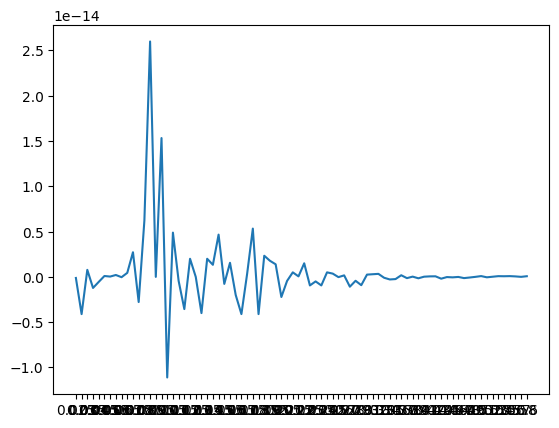

In [9]:
plt.plot(df_freqstat.loc['rmse'] - nbp_freq_rmse)

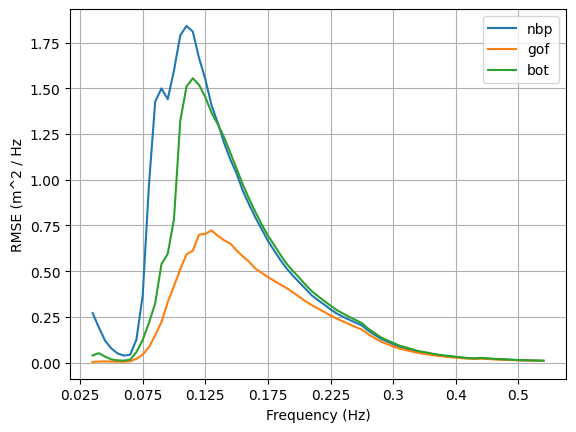

In [35]:
plt.plot(data['frequency'], nbp_freq_rmse.data, label='nbp')
plt.plot(data['frequency'], gof_freq_rmse.data, label='gof')
plt.plot(data['frequency'], bot_freq_rmse.data, label='bot')
plt.xticks(freq[::10])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('RMSE (m^2 / Hz')
plt.legend()
plt.savefig(r'plots/spectra_rmse.png', dpi=360)

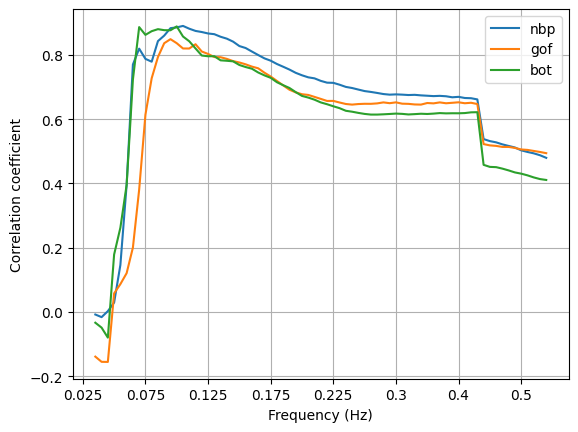

In [36]:
plt.plot(data['frequency'], nbp_freq_corr.data, label='nbp')
plt.plot(data['frequency'], gof_freq_corr.data, label='gof')
plt.plot(data['frequency'], bot_freq_corr.data, label='bot')
plt.xticks(freq[::10])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Correlation coefficient')
plt.legend()
plt.savefig(r'plots/spectra_corr.png', dpi=360)

In [5]:
freq  = data['frequency'].to_numpy()
freq

array(['0.025', '0.03', '0.035', '0.04', '0.045', '0.05', '0.055', '0.06',
       '0.065', '0.07', '0.075', '0.08', '0.085', '0.09', '0.095', '0.1',
       '0.105', '0.11', '0.115', '0.12', '0.125', '0.13', '0.135', '0.14',
       '0.145', '0.15', '0.155', '0.16', '0.165', '0.17', '0.175', '0.18',
       '0.185', '0.19', '0.195', '0.2', '0.205', '0.21', '0.215', '0.22',
       '0.225', '0.23', '0.235', '0.24', '0.245', '0.25', '0.26', '0.27',
       '0.28', '0.29', '0.3', '0.31', '0.32', '0.33', '0.34', '0.35',
       '0.36', '0.37', '0.38', '0.39', '0.4', '0.41', '0.42', '0.43',
       '0.44', '0.45', '0.46', '0.47', '0.48', '0.49', '0.5', '0.51',
       '0.52', '0.53', '0.54', '0.55', '0.56', '0.57', '0.58', '0.6'],
      dtype='<U5')

In [18]:
fmi_nbp_spec.dtype

dtype('float64')

In [6]:
nbp_true_params = calculate_wave_params(fmi_nbp_spec, freq.astype(float))
nbp_pred_params = calculate_wave_params(nora_nbp_spec, freq.astype(float))

gof_true_params = calculate_wave_params(fmi_gof_spec, freq.astype(float))
gof_pred_params = calculate_wave_params(nora_gof_spec, freq.astype(float))

bot_true_params = calculate_wave_params(fmi_bot_spec, freq.astype(float))
bot_pred_params = calculate_wave_params(nora_bot_spec, freq.astype(float))

nbp_df_waveparam = wave_param_descriptor(nbp_true_params, nbp_pred_params)
gof_df_waveparam = wave_param_descriptor(gof_true_params, gof_pred_params)
bot_df_waveparam = wave_param_descriptor(bot_true_params, bot_pred_params)

In [7]:
nbp_df_waveparam

,tp,hs,tm01,tm_10,tm02,fm,wm
rho,0.251335,0.936822,NaN,NaN,NaN,NaN,NaN
me,1.141398,-0.029092,NaN,NaN,NaN,NaN,NaN
mae,1.448474,0.194126,NaN,NaN,NaN,NaN,NaN
mse,23.326513,0.092979,NaN,NaN,NaN,NaN,NaN
rmse,4.829753,0.304924,NaN,NaN,NaN,NaN,NaN
nrmse,0.756701,0.268097,NaN,NaN,NaN,NaN,NaN


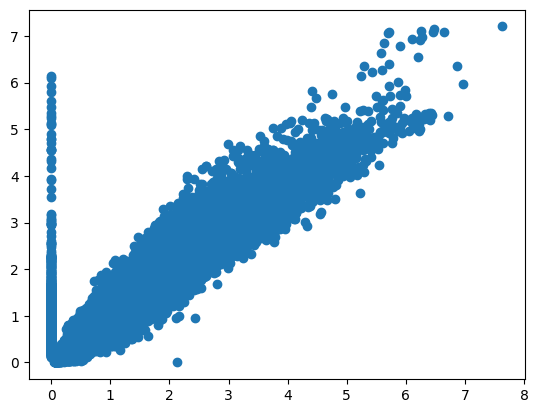

In [13]:
plt.scatter(nbp_true_params[:,1], nbp_pred_params[:,1])

In [12]:
nbp_true_params

array([[40.        ,  0.        ,         nan, ...,         nan,
                nan,         nan],
       [ 7.40740741,  1.68745816,  6.79762346, ...,  6.47607514,
         0.14711024,  0.92432088],
       [ 7.40740741,  1.86632248,  6.97334776, ...,  6.67787999,
         0.14340315,  0.90102853],
       ...,
       [ 8.        ,  2.30027071,  5.71698572, ...,  5.27744606,
         0.17491735,  1.09903813],
       [ 8.        ,  2.47108876,  5.81310328, ...,  5.43649797,
         0.17202516,  1.08086593],
       [ 8.        ,  2.13202213,  5.71452338, ...,  5.28829644,
         0.17499272,  1.0995117 ]])